In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [24]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<b>
gender = gender;
age = age;
hypertension = Hypertension binary feature;
heart_disease = Heart disease binary featur;
ever_married = Has the patient ever been married?;
work_type = Work type of the patient;
Residence_type = Residence type of the patient;
avg_glucose_level = Average glucose level in blood;
bmi = Body Mass Index; </b>

#### Заменем пропущенные значения в "bmi" средним значением "bmi" для их пола

In [26]:
F_missing_bmi_index = df[(df.gender == 'Female') & (df.bmi.isna())].index
df.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = df[(df.gender == 'Male') & (df.bmi.isna())].index
df.loc[M_missing_bmi_index, 'bmi'] = 28


In [27]:
df_res = df.drop('id',axis = 1)
df_res.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<AxesSubplot:>

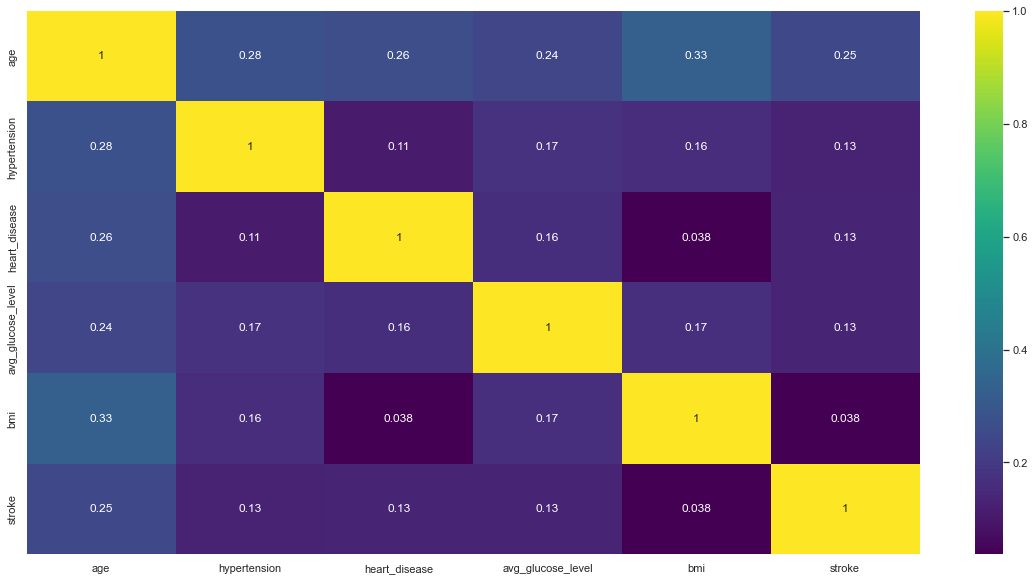

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df_res.corr(), annot= True,cmap= 'viridis')